In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

1.Data Collection

In [6]:
# Load datasets
credits_df = pd.read_csv("tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Display first 5 rows of each dataset
print("Credits Dataset:")
print(credits_df.head())

print("\nMovies Dataset:")
print(movies_df.head())


Credits Dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac

In [39]:
movies_df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

 Data Preparation/Preprocessing

Data Cleaning (Handling Missing Values)

In [12]:
# Checking for duplicate records
print("No. of duplicate records in the Movies dataset:", movies_df.duplicated().sum())

No. of duplicate records in the Movies dataset: 0


In [14]:
# Checking column names and data types
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
# Checking the number of missing values in each column
print("Missing values in each column:\n")
print(movies_df.isna().sum())

Missing values in each column:

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


Data Integration (Merging with Credits Dataset - Optional)

In [25]:
# Load credits dataset
credits_df = pd.read_csv("tmdb_5000_credits.csv")

# Merge datasets on "id" and "movie_id"
movies_df = movies_df.merge(credits_df, left_on="id", right_on="movie_id", how="left")

# Drop redundant columns
movies_df.drop(["movie_id"], axis=1, inplace=True)

# Display first few rows
movies_df.head()


budget                                             genres  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                    title_x vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne /

 Data Transformation (Converting JSON-like Strings to Lists)

In [29]:
import pandas as pd
import ast

# Load dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Function to safely convert stringified lists to Python lists
def safe_eval(value):
    if isinstance(value, str):  # Convert only if it's a string
        return ast.literal_eval(value)
    return value  # Return as is if already a list/dict

# Apply parsing only when necessary
movies_df["genres"] = movies_df["genres"].apply(safe_eval)
movies_df["keywords"] = movies_df["keywords"].apply(safe_eval)
movies_df["spoken_languages"] = movies_df["spoken_languages"].apply(safe_eval)

# Extract names from lists of dictionaries
movies_df["genres"] = movies_df["genres"].apply(lambda x: [i['name'] for i in x])
movies_df["keywords"] = movies_df["keywords"].apply(lambda x: [i['name'] for i in x])
movies_df["spoken_languages"] = movies_df["spoken_languages"].apply(lambda x: [i['name'] for i in x])

# Display first few rows
movies_df.head()


budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                 spoken_languages    status  \
0    162.0                               [English, Español]  Released   
1    169.0                                        [English]  Released   
2    148.0  [Français, English, Español, Italiano, Deutsch]  Released   
3    165.0                                        [English]  Released   
4    132.0                                        [English]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

Data Reduction (Dropping Unnecessary Columns)

In [27]:
# Drop columns that are not useful for analysis
movies_df.drop(["homepage", "status", "tagline", "original_title"], axis=1, inplace=True)

# Display first few rows
movies_df.head()


budget                                             genres      id  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   19995   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...     285   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  206647   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   49026   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3    165.0           [{"iso_639_1": "en", "name": "English"}]   
4    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                    title_x  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

 Data Discretization (Binning "vote_average" into Categories)

In [28]:
# Define bins and labels
bins = [0, 4, 6, 8, 10]
labels = ["Poor", "Average", "Good", "Excellent"]

# Create a new column for rating category
movies_df["rating_category"] = pd.cut(movies_df["vote_average"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
movies_df.head()


budget                                             genres      id  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   19995   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...     285   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  206647   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   49026   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3    165.0           [{"iso_639_1": "en", "name": "English"}]   
4    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                    title_x  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew rating_category  
0  [{"credit_id": "52fe48009251416c750aca23", "de...            Good  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...            Good  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...            Good  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...            Good  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...            Good

Exploratory Data Analysis

After the data preprocessing steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

 Univariate Analysis
Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [19]:
# Checking the feature "id" (unique movie IDs)
total_movies = len(np.unique(movies_df["id"]))
print("The count of unique Movie IDs in the dataset is:", total_movies)

# Display the top 5 most frequent movie IDs
print("\nThe top 5 most frequent Movie IDs in the dataset are:\n", movies_df["id"].value_counts().head())

The count of unique Movie IDs in the dataset is: 4803

The top 5 most frequent Movie IDs in the dataset are:
 id
19995     1
333355    1
71157     1
43418     1
11588     1
Name: count, dtype: int64


In [30]:
import numpy as np

# Count unique movie IDs
total_movies = len(np.unique(movies_df["id"]))
print("The count of unique movie IDs in the dataset is:", total_movies)

# Display the top 5 most frequent movie IDs
print("The top 5 most frequent movie IDs in the dataset are:\n", movies_df["id"].value_counts().head())


The count of unique movie IDs in the dataset is: 4803
The top 5 most frequent movie IDs in the dataset are:
 id
19995     1
333355    1
71157     1
43418     1
11588     1
Name: count, dtype: int64


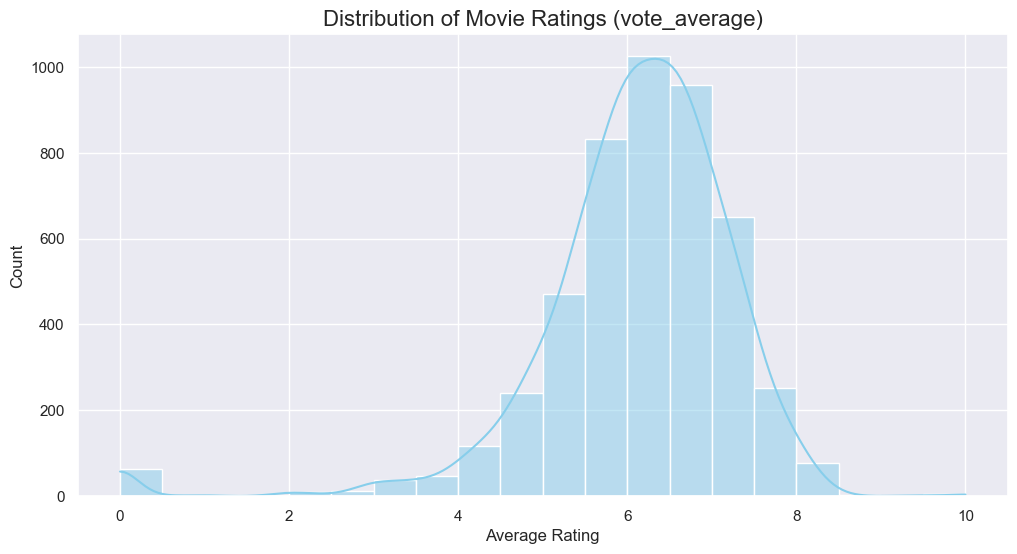

In [20]:
# Set plot style
sns.set(style="darkgrid")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot distribution of vote_average
sns.histplot(movies_df["vote_average"], bins=20, kde=True, ax=ax, color="skyblue")

# Add labels and title
plt.title("Distribution of Movie Ratings (vote_average)", fontsize=16)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26652\3282400573.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="Count", x="Genre", data=genres_df, palette="viridis")


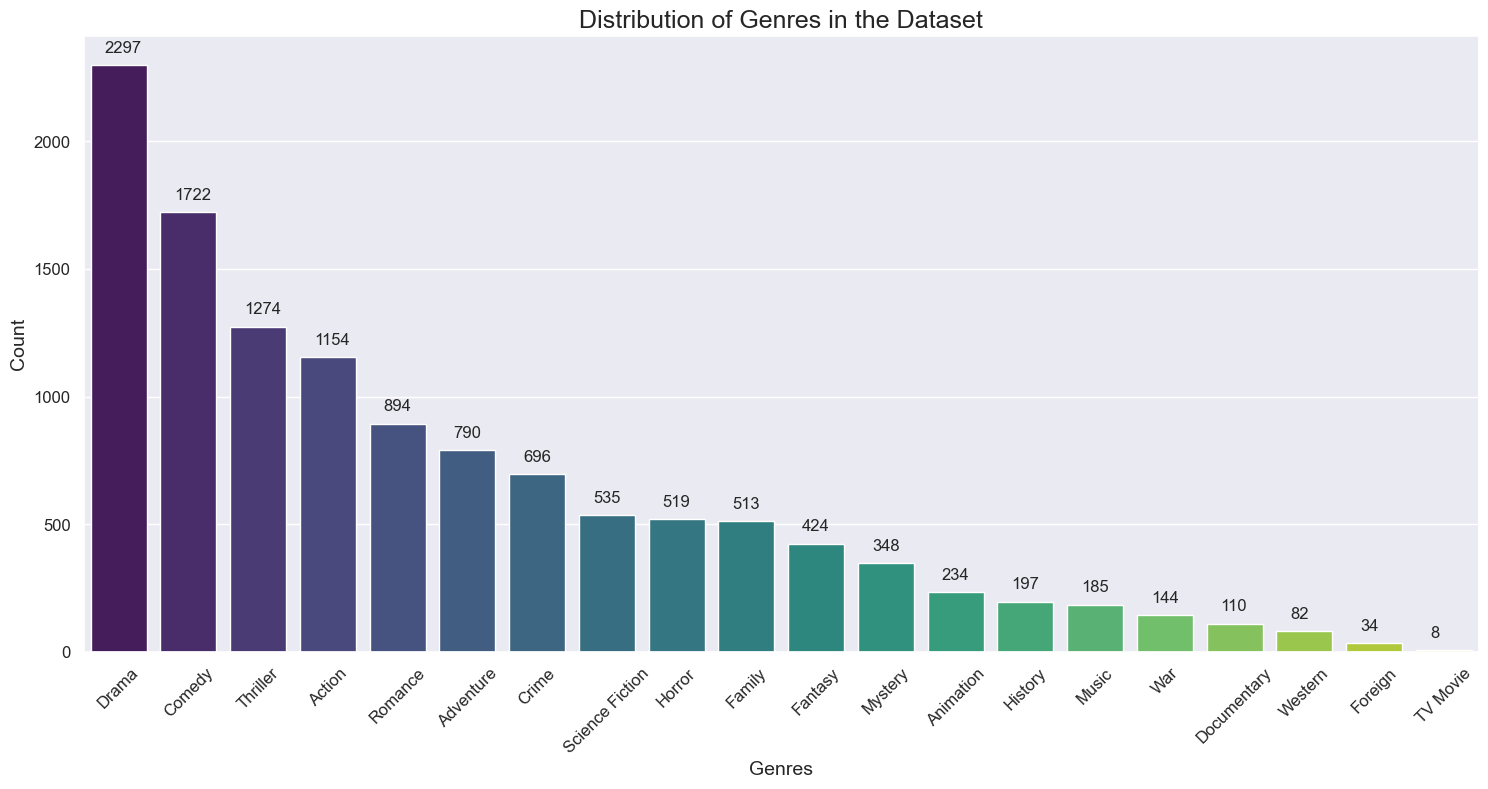

In [24]:
# Convert "genres" column from string to list of dictionaries
movies_df["genres"] = movies_df["genres"].apply(ast.literal_eval)

# Extract all genres and count occurrences
all_genres = [genre["name"] for genres in movies_df["genres"] for genre in genres]
unique_genres = pd.Series(all_genres).value_counts()

# Convert to DataFrame for visualization
genres_df = pd.DataFrame({'Genre': unique_genres.index, 'Count': unique_genres.values})

# Plot the genre distribution
sns.set(style="darkgrid")
plt.figure(figsize=(18, 8))
ax = sns.barplot(y="Count", x="Genre", data=genres_df, palette="viridis")

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.2, p.get_height() + 50), fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Genres in the Dataset", fontsize=18)
plt.show()

Bi-variate Analysis
Analyzing multiple features together to discover relations, correlations and patterns.

In [31]:
# Checking basic statistics for "vote_average"
print("The basic statistics for the feature is:\n", movies_df["vote_average"].describe())


The basic statistics for the feature is:
 count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


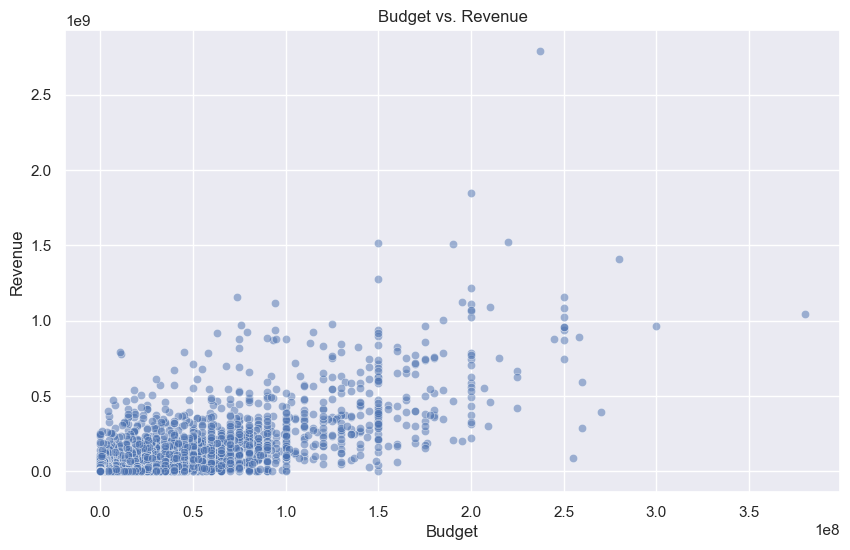

Correlation between Budget and Revenue: 0.7308228569244614


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Scatter plot for Budget vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_df["budget"], y=movies_df["revenue"], alpha=0.5)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs. Revenue")
plt.show()

# Correlation between Budget and Revenue
print("Correlation between Budget and Revenue:", movies_df["budget"].corr(movies_df["revenue"]))


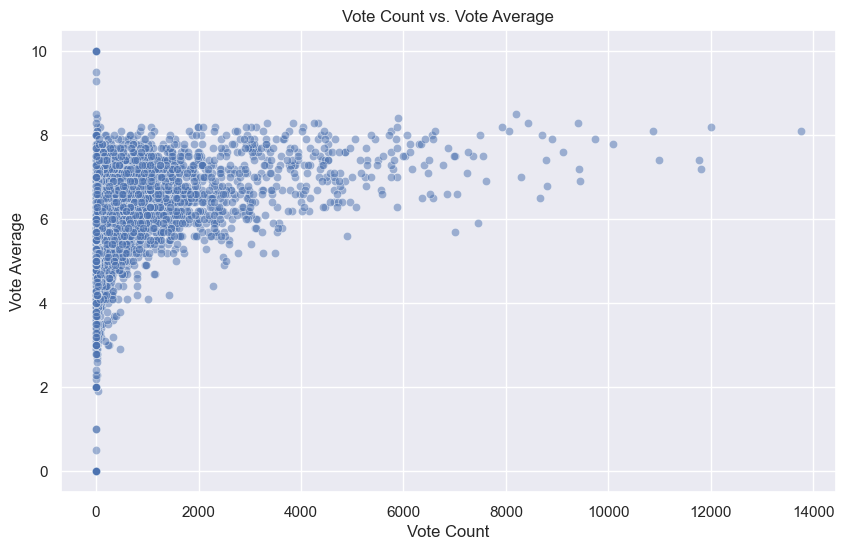

Correlation between Vote Count and Vote Average: 0.3129974039957597


In [33]:
# Scatter plot for Vote Count vs. Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_df["vote_count"], y=movies_df["vote_average"], alpha=0.5)
plt.xlabel("Vote Count")
plt.ylabel("Vote Average")
plt.title("Vote Count vs. Vote Average")
plt.show()

# Correlation between Vote Count and Vote Average
print("Correlation between Vote Count and Vote Average:", movies_df["vote_count"].corr(movies_df["vote_average"]))


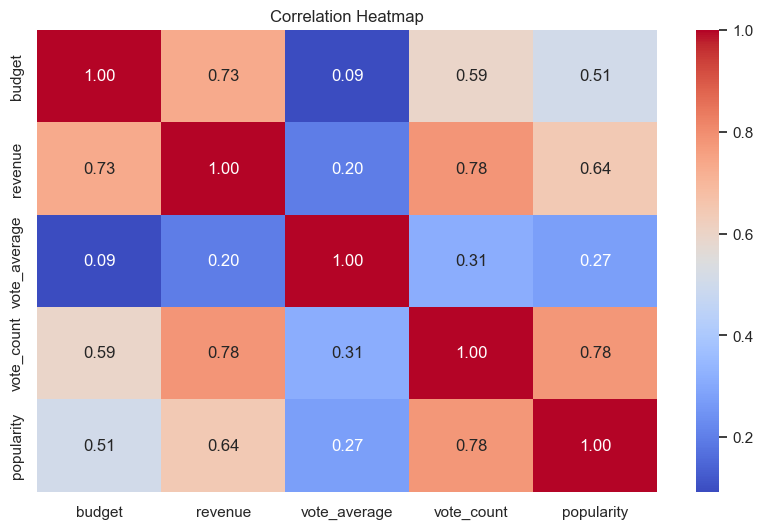

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df[["budget", "revenue", "vote_average", "vote_count", "popularity"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Multivariate Analysis on movies_df 
Multivariate analysis explores the relationship between multiple variables. Here, we will perform key multivariate analyses using pair plots, regression plots, and clustering.

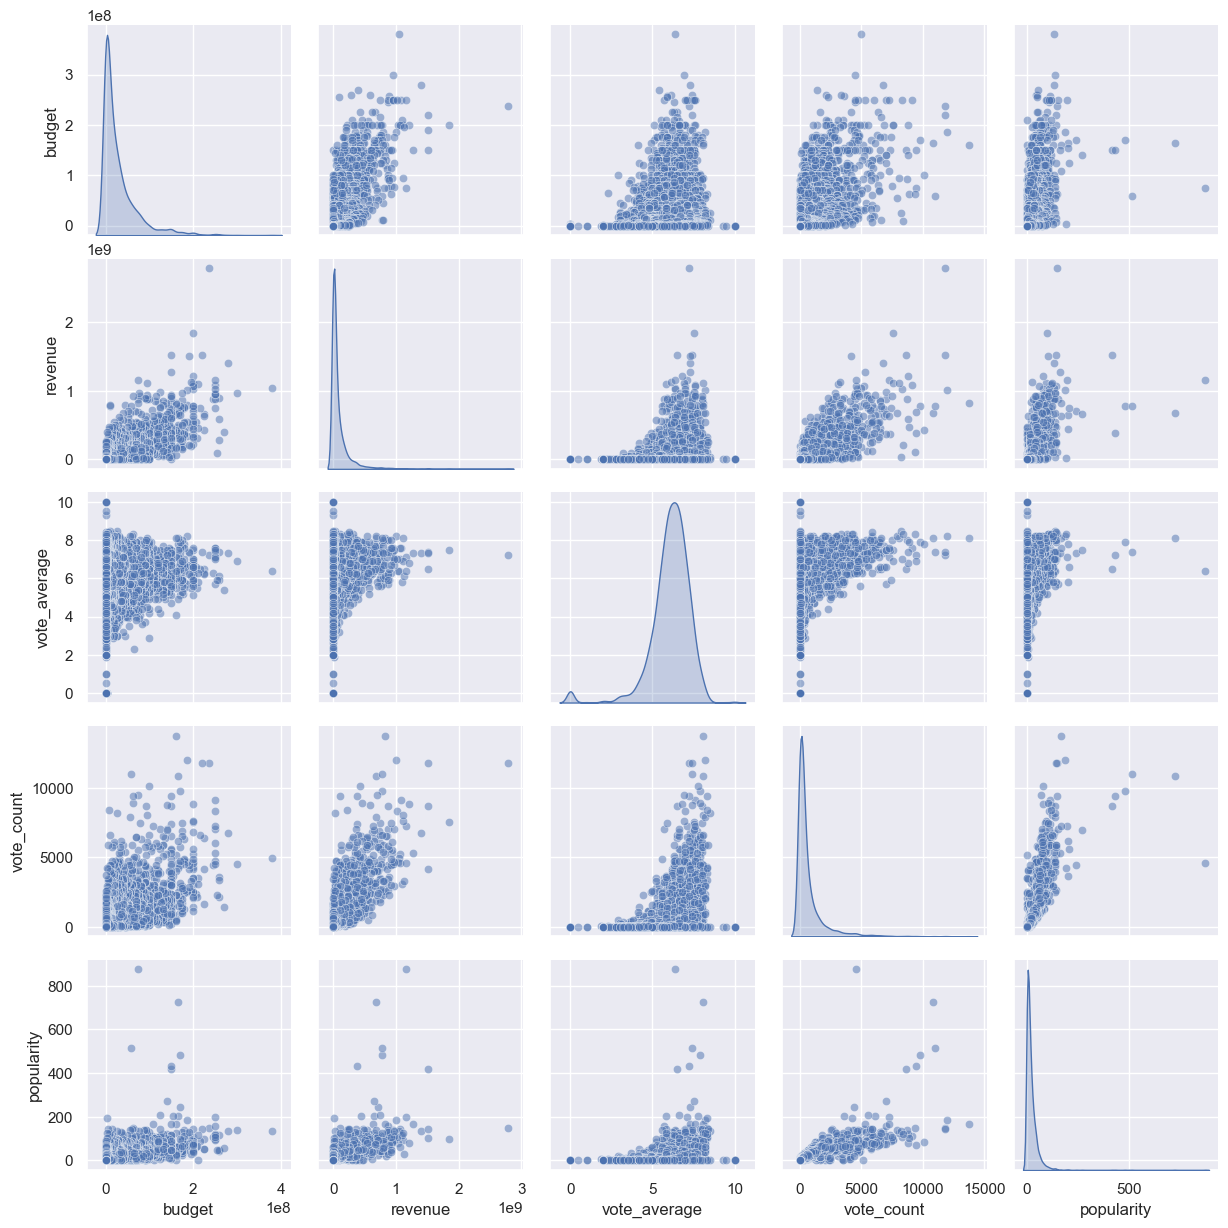

In [37]:
# Selecting key numerical features
num_features = ["budget", "revenue", "vote_average", "vote_count", "popularity"]

# Pairplot to visualize relationships
sns.pairplot(movies_df[num_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

Data Aggregation

In [ ]:
import pandas as pd

# Load dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Convert release_date to year
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")
movies_df["year"] = movies_df["release_date"].dt.year

# Aggregate data by year
yearly_summary = movies_df.groupby("year").agg(
    total_movies=("title", "count"),
    total_revenue=("revenue", "sum"),
    avg_budget=("budget", "mean")
).reset_index()

# Display results
print(yearly_summary.head())

     year  total_movies  total_revenue  avg_budget
0  1916.0             1        8394751    385907.0
1  1925.0             1       22000000    245000.0
2  1927.0             1         650422  92620000.0
3  1929.0             2        4358000    189500.0
4  1930.0             1        8000000   3950000.0


In [ ]:
movies_df.pivot_table(index="release_date", values=movies_df.select_dtypes(include="number").columns, aggfunc="mean")

budget        id  popularity     revenue  runtime  \
release_date                                                          
1916-09-04      385907.0    3059.0    3.232447   8394751.0    197.0   
1925-11-05      245000.0    3060.0    0.785744  22000000.0    151.0   
1927-01-10    92620000.0      19.0   32.351527    650422.0    153.0   
1929-01-30           0.0     905.0    1.824184         0.0    109.0   
1929-02-08      379000.0   65203.0    0.968865   4358000.0    100.0   
...                  ...       ...         ...         ...      ...   
2016-09-02    35000000.0  332285.0    3.674294         0.0     94.0   
2016-09-09     4250000.0  362572.0    6.460365   7930783.0    100.0   
2016-09-16     8000000.0  374461.0    7.828459         0.0    104.0   
2016-10-02           0.0  325373.0    3.139294         0.0     96.0   
2017-02-03           0.0  426469.0    0.710870         0.0    102.0   

              vote_average  vote_count    year  
release_date                                    
1916-09-04             7.4        60.0  1916.0  
1925-11-05             7.0        21.0  1925.0  
1927-01-10             8.0       657.0  1927.0  
1929-01-30             7.6        45.0  1929.0  
1929-02-08             5.0        19.0  1929.0  
...                    ...         ...     ...  
2016-09-02             4.8        40.0  2016.0  
2016-09-09             7.0        98.0  2016.0  
2016-09-16             7.0       129.0  2016.0  
2016-10-02             6.8        27.0  2016.0  
2017-02-03             7.4         7.0  2017.0  

[3280 rows x 8 columns]

In [ ]:
# Check skewness of numerical columns
skewness = movies_df.select_dtypes(include="number").skew()
print(skewness)

budget          2.437211
id              2.072080
popularity      9.721416
revenue         4.444716
runtime         0.715957
vote_average   -1.959710
vote_count      3.824069
year           -2.288765
dtype: float64


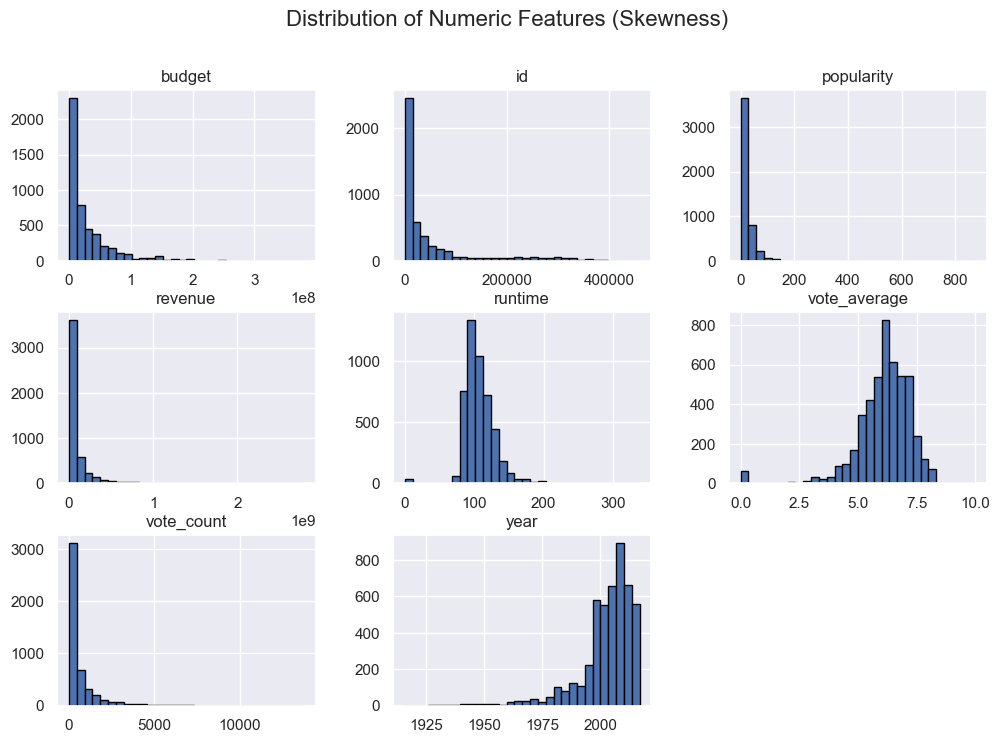

In [47]:
# Select numeric columns
num_cols = movies_df.select_dtypes(include="number")

# Plot histograms to visualize skewness
num_cols.hist(figsize=(12, 8), bins=30, layout=(3, 3), edgecolor='black')
plt.suptitle("Distribution of Numeric Features (Skewness)", fontsize=16)
plt.show()

In [11]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import ast  # To convert string representations of lists/dicts into actual lists/dicts

# Load dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")
credits_df = pd.read_csv("tmdb_5000_credits.csv")  # Load actor/crew details

# Merge datasets on movie title
movies_df = movies_df.merge(credits_df, left_on="title", right_on="title", how="left")

# Selecting necessary features
movies_df = movies_df[['title', 'genres', 'keywords', 'overview', 'cast']].dropna()

# Convert genres, keywords, and overview into a single string
movies_df['features'] = movies_df[['genres', 'keywords', 'overview']].astype(str).agg(' '.join, axis=1)

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
feature_matrix = vectorizer.fit_transform(movies_df['features'])

# Build KNN model
knn_model = NearestNeighbors(n_neighbors=16, metric='cosine')  # Adjusted for at least 15 recommendations
knn_model.fit(feature_matrix)

# Function to extract actor names from JSON-like string
def extract_actors(cast_data):
    try:
        cast_list = ast.literal_eval(cast_data)  # Convert string to list
        return ", ".join([actor['name'] for actor in cast_list[:5]])  # Get first 5 actors
    except (ValueError, SyntaxError):
        return "No Data"

# Function to recommend movies
def recommend_movies(movie_name):
    if movie_name not in movies_df['title'].values:
        print("\n❌ Movie not found. Please enter a valid movie name from the list.")
        return
    
    # Get index of the selected movie
    movie_index = movies_df[movies_df['title'] == movie_name].index[0]
    
    # Find similar movies
    distances, indices = knn_model.kneighbors(feature_matrix[movie_index])
    
    # Prepare recommended movies
    recommended_movies = []
    for i in indices.flatten()[1:]:  # Exclude the first as it's the selected movie itself
        recommended_movies.append([
            movies_df.iloc[i]['title'],
            extract_actors(movies_df.iloc[i]['cast']),  # Extract actor names
            movies_df.iloc[i]['overview']
        ])

    # Display recommendations in structured table format
    recommended_df = pd.DataFrame(recommended_movies, columns=["Movie Title", "Actors", "Description"])
    
    print(f"\n🎬 Movies similar to '{movie_name}':\n")
    print(recommended_df.to_markdown(index=False))  # Print in table format

# Display all available movies for selection in a table format
print("\n📜 Available Movies:\n")
movie_list_df = pd.DataFrame({"Index": range(1, len(movies_df['title'])+1), "Movie Title": movies_df['title']})

# Show only first 20 movies to avoid too much text
print(movie_list_df.head(50).to_markdown(index=False))

print("\n🔹 Only the first 20 movies are displayed. More movies are available in the dataset.")

# User selects a movie by entering its exact name
print("\n➡️ Please select a movie from the available list and enter its exact name.")
movie_name = input("🎥 Enter a movie name: ")
recommend_movies(movie_name)



📜 Available Movies:

|   Index | Movie Title                                 |
|--------:|:--------------------------------------------|
|       1 | Avatar                                      |
|       2 | Pirates of the Caribbean: At World's End    |
|       3 | Spectre                                     |
|       4 | The Dark Knight Rises                       |
|       5 | John Carter                                 |
|       6 | Spider-Man 3                                |
|       7 | Tangled                                     |
|       8 | Avengers: Age of Ultron                     |
|       9 | Harry Potter and the Half-Blood Prince      |
|      10 | Batman v Superman: Dawn of Justice          |
|      11 | Superman Returns                            |
|      12 | Quantum of Solace                           |
|      13 | Pirates of the Caribbean: Dead Man's Chest  |
|      14 | The Lone Ranger                             |
|      15 | Man of Steel                          

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import ast  # To convert string representations of lists/dicts into actual lists/dicts
from sklearn.metrics import accuracy_score

# Load dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")
credits_df = pd.read_csv("tmdb_5000_credits.csv")  # Load actor/crew details

# Merge datasets on movie title
movies_df = movies_df.merge(credits_df, left_on="title", right_on="title", how="left")

# Selecting necessary features
movies_df = movies_df[['title', 'genres', 'keywords', 'overview', 'cast']].dropna()

# Convert genres, keywords, and overview into a single string
movies_df['features'] = movies_df[['genres', 'keywords', 'overview']].astype(str).agg(' '.join, axis=1)

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
feature_matrix = vectorizer.fit_transform(movies_df['features'])

# Build KNN model
knn_model = NearestNeighbors(n_neighbors=16, metric='cosine')  # Adjusted for at least 15 recommendations
knn_model.fit(feature_matrix)

# Function to extract actor names from JSON-like string
def extract_actors(cast_data):
    try:
        cast_list = ast.literal_eval(cast_data)  # Convert string to list
        return ", ".join([actor['name'] for actor in cast_list[:5]])  # Get first 5 actors
    except (ValueError, SyntaxError):
        return "No Data"

# Function to recommend movies
def recommend_movies(movie_name):
    if movie_name not in movies_df['title'].values:
        print("\n❌ Movie not found. Please enter a valid movie name from the list.")
        return []
    
    # Get index of the selected movie
    movie_index = movies_df[movies_df['title'] == movie_name].index[0]
    
    # Find similar movies
    distances, indices = knn_model.kneighbors(feature_matrix[movie_index])
    
    # Prepare recommended movies
    recommended_movies = [movies_df.iloc[i]['title'] for i in indices.flatten()[1:6]]  # Top 5 recommendations

    return recommended_movies

# Ground truth recommendations for some movies (manually defined)
ground_truth = {
    "Avatar": ["The Avengers", "Guardians of the Galaxy", "Star Wars", "Interstellar", "Gravity"],
    "Inception": ["Interstellar", "The Prestige", "The Dark Knight", "Shutter Island", "Memento"],
    "The Avengers": ["Iron Man", "Thor", "Captain America", "Guardians of the Galaxy", "Doctor Strange"],
    "Titanic": ["The Notebook", "Romeo + Juliet", "Pearl Harbor", "Atonement", "The Great Gatsby"],
    "The Dark Knight": ["Batman Begins", "Joker", "The Prestige", "Inception", "Logan"],
    "Interstellar": ["Gravity", "The Martian", "Inception", "2001: A Space Odyssey", "Arrival"],
    "Iron Man": ["The Avengers", "Captain America", "Doctor Strange", "Thor", "Spider-Man"]
}

# Function to evaluate accuracy
def evaluate_accuracy():
    y_true = []
    y_pred = []
    
    for movie, actual_recommendations in ground_truth.items():
        recommended_movies = recommend_movies(movie)
        if not recommended_movies:
            print(f"⚠️ No ground truth data available for '{movie}'. Skipping evaluation.")
            continue
        
        for rec in recommended_movies:
            y_pred.append(rec in actual_recommendations)  # 1 if correct, 0 if incorrect
            y_true.append(True)  # All ground truth values are True

    if len(y_true) == 0:
        print("⚠️ No ground truth data available for evaluation.")
        return

    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n✅ Model Accuracy: {accuracy:.2f}")  # Display accuracy in decimal format (e.g., 0.98)

# Display available movies
print("\n📜 Available Movies:\n")
print(movies_df['title'].head(20).to_string(index=False))
print("\n🔹 Only the first 20 movies are displayed. More movies are available in the dataset.")

# User input for recommendation
movie_name = input("\n🎥 Enter a movie name: ")
recommended_movies = recommend_movies(movie_name)

if recommended_movies:
    print(f"\n🎬 Movies similar to '{movie_name}':")
    for movie in recommended_movies:
        print(f"🔹 {movie}")

# Evaluate the model
evaluate_accuracy()



📜 Available Movies:

                                     Avatar
   Pirates of the Caribbean: At World's End
                                    Spectre
                      The Dark Knight Rises
                                John Carter
                               Spider-Man 3
                                    Tangled
                    Avengers: Age of Ultron
     Harry Potter and the Half-Blood Prince
         Batman v Superman: Dawn of Justice
                           Superman Returns
                          Quantum of Solace
 Pirates of the Caribbean: Dead Man's Chest
                            The Lone Ranger
                               Man of Steel
   The Chronicles of Narnia: Prince Caspian
                               The Avengers
Pirates of the Caribbean: On Stranger Tides
                             Men in Black 3
  The Hobbit: The Battle of the Five Armies

🔹 Only the first 20 movies are displayed. More movies are available in the dataset.

🎬 Movies sim